In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [56]:
def to_date(x):
    return datetime.strptime(x, "%Y-%m-%d")
def to_date_2(x):
    return datetime.strptime(x, "%m/%d/%y")

In [21]:
df = pd.read_csv("counties2(1).csv")
df["ctname"] = df['county_name'].str.cat(df['STABREV'],sep=", ")
df.head(3)

,Unnamed: 0,rfgrp,popuni,stname,STABREV,state_deaths,county_name,countyFIPS,County Name,State,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,ctname
0,0,32.2,23925,South Carolina,SC,3620.0,Abbeville County,45001,Abbeville County,SC,...,723,733,739,747,754,760,768,779,789,"Abbeville County, SC"
1,1,59.8,61894,Louisiana,LA,5194.0,Acadia Parish,22001,Acadia Parish,LA,...,3108,3108,3108,3119,3119,3139,3147,3158,3169,"Acadia Parish, LA"
2,2,59.8,32318,Virginia,VA,3466.0,Accomack County,51001,Accomack County,VA,...,1204,1206,1206,1207,1210,1211,1214,1214,1219,"Accomack County, VA"


In [55]:
mydf = df.iloc[:, 11:]
my_df = mydf.drop_duplicates("ctname").set_index("ctname").T
my_df = my_df.reset_index().rename({"index":"date"}, axis = 1)
dates_list = list(my_df["date"].apply(lambda x: to_date_2(x)))[:]
my_df["date"] = dates_list
my_df.head(5)

ctname,date,"Abbeville County, SC","Acadia Parish, LA","Accomack County, VA","Ada County, ID","Adair County, IA","Adair County, KY","Adair County, MO","Adair County, OK","Adams County, CO",...,"York County, SC","York County, VA","Young County, TX","Yuba County, CA","Yukon-Koyukuk Census Area, AK","Yuma County, AZ","Yuma County, CO","Zapata County, TX","Zavala County, TX","Ziebach County, SD"
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_mobUS = pd.read_csv("df_mobility_US_clean.csv")
dates_list = list(df_mobUS["date"].apply(lambda x: to_date(x)))[:]
df_mobUS["date"] = dates_list
df_mobUS["deaths"] = np.zeros(df_mobUS.shape[0])
print(df_mobUS.shape)
df_mobUS.head(5)

(628564, 14)


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0


In [89]:
counties = df_mobUS["sub_region_2"].drop_duplicates()
counties_with_no_data = []
for county in counties:
    try:
        idxs = df_mobUS[df_mobUS["sub_region_2"] == county].index
        temp_dates = pd.DataFrame(df_mobUS.loc[idxs, "date"])
        temp = temp_dates.merge(my_df[["date", county]], how = "left",
                                left_on = "date", right_on = "date")
        deaths = np.asanyarray(temp.iloc[:,1])
        df_mobUS.loc[idxs, "deaths"] = deaths
    except:
        counties_with_no_data.append(county)
        continue
df_mobUS.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0


In [96]:
counties_with_no_data[:15]

['Anchorage, AK',
 'Bethel, AK',
 'Fairbanks North Star, AK',
 'Juneau, AK',
 'Ketchikan Gateway, AK',
 'Kodiak Island, AK',
 'Matanuska-Susitna, AK',
 'North Slope, AK',
 'Sitka, AK',
 'Southeast Fairbanks, AK',
 'Valdez-Cordova, AK',
 'Broomfield County, CO',
 'LaSalle County, IL',
 'DeKalb County, IN',
 'LaGrange County, IN']

In [9]:
print(df_mobUS.shape)
df_mobUS.head(5)

(628564, 14)


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0


In [10]:
df_com_res_raw = pd.read_csv("cre-2018-a11.csv")
df_com_res_raw.head(3)

,state,county,tract,rfgrp,prednum,prednum_moe,predrt,predrt_moe,stname,STABREV,ctname,popuni
0,1,1,0,0RF,17545,4022.9,31.66,7.26,Alabama,AL,"Autauga County, AL",55420
1,1,1,0,1-2RF,24796,4320.5,44.74,7.80,Alabama,AL,"Autauga County, AL",55420
2,1,1,0,3PLRF,13079,3606.6,23.60,6.51,Alabama,AL,"Autauga County, AL",55420


In [16]:
df_com_raw = df_com_res_raw[["ctname", "rfgrp"]].set_index("ctname")
print(df_com_raw.shape)
df_com_raw.head(5)

(228594, 1)


,rfgrp
ctname,
"Autauga County, AL",0RF
"Autauga County, AL",1-2RF
"Autauga County, AL",3PLRF
"Autauga County, AL",0RF
"Autauga County, AL",1-2RF


In [41]:
temp = df_mobUS[["sub_region_2", "country_region_code"]].set_index("sub_region_2")
print(temp.shape)
temp.head(5)

(628564, 1)


,country_region_code
sub_region_2,
"Autauga County, AL",US
"Autauga County, AL",US
"Autauga County, AL",US
"Autauga County, AL",US
"Autauga County, AL",US


In [42]:
temp2 = df[["rfgrp","popuni", "countyFIPS", "ctname"]].drop_duplicates(subset = ["ctname", "rfgrp"])

In [48]:
my_df2 = temp.merge(temp2, how = "left", left_on = "sub_region_2", right_on = "ctname")
my_df2.head(5)

,country_region_code,rfgrp,popuni,countyFIPS,ctname
0,US,59.8,55420.0,1001.0,"Autauga County, AL"
1,US,59.8,55420.0,1001.0,"Autauga County, AL"
2,US,59.8,55420.0,1001.0,"Autauga County, AL"
3,US,59.8,55420.0,1001.0,"Autauga County, AL"
4,US,59.8,55420.0,1001.0,"Autauga County, AL"


In [49]:
df_mobUS["rfgrp"] = np.asanyarray(my_df2["rfgrp"])
df_mobUS["popuni"] = np.asanyarray(my_df2["popuni"])
print(df_mobUS.shape)
df_mobUS.head()

(628564, 16)


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths,rfgrp,popuni
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0,59.8,55420.0
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0,59.8,55420.0
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0,59.8,55420.0
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,55420.0
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,55420.0


In [50]:
df_mobUS.to_csv(r"counties_with_deaths_and_mobility.csv", index = False, header = True)

In [68]:
def city_size(x):
    if x < 50000:
        return "rural area"
    elif x < 200000:
        return "small urban area"
    elif x < 500000:
        return "medium-size urban area"
    elif x < 1500000:
        return "metropolitan area"
    else:
        return "large metropolitan areas"

In [69]:
df_mobUS = pd.read_csv("counties_with_deaths_and_mobility.csv")
dates_list = list(df_mobUS["date"].apply(lambda x: to_date(x)))[:]
size_area = list(df_mobUS["popuni"].apply(lambda x: city_size(x)))
df_mobUS["date"] = dates_list
df_mobUS["county size"] = size_area
df_mobUS.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths,rfgrp,popuni,county size
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0,59.8,55420.0,small urban area
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0,59.8,55420.0,small urban area
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0,59.8,55420.0,small urban area
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,55420.0,small urban area
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,55420.0,small urban area


In [76]:
df_mobUS["county size"].value_counts()

rural area                  372995
small urban area            159861
medium-size urban area       47360
metropolitan area            28928
large metropolitan areas     19420
Name: county size, dtype: int64

In [70]:
cities = ["Houston County, TX", "Glades County, FL", "Hidalgo County, TX"]
selected_index = []
for city in cities:
    selected_index += list(df_mobUS[df_mobUS["sub_region_2"] == city].index)
print("number of elements", len(selected_index))

number of elements 718


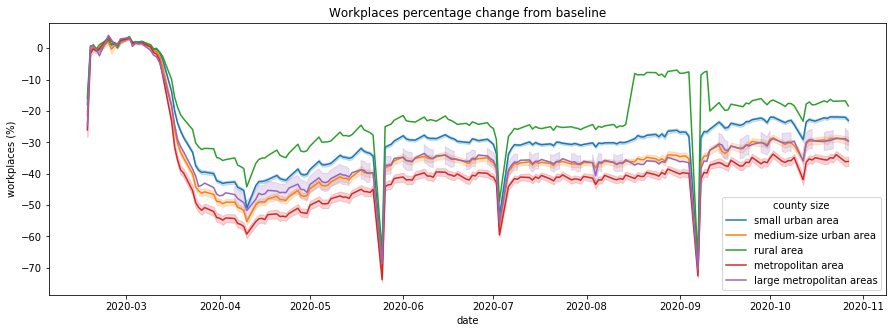

In [77]:
data = df_mobUS #.loc[selected_index, :]
data = data[data["weekend"] == 0]
plt.figure(figsize = (15, 5))
plt.title("Workplaces percentage change from baseline")
sns.lineplot(data = data, x = "date", y = "workplaces (%)", hue = "county size")
plt.xticks(rotation = 0)
plt.show()

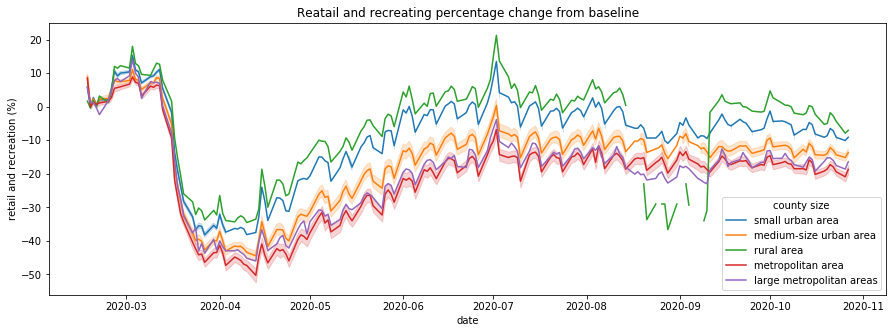

In [78]:
data = df_mobUS #.loc[selected_index, :]
data = data[data["weekend"] == 0]
plt.figure(figsize = (15, 5))
plt.title("Reatail and recreating percentage change from baseline")
sns.lineplot(data = data, x = "date", y = "retail and recreation (%)", hue = "county size")
plt.xticks(rotation = 0)
plt.show()